<a href="https://colab.research.google.com/github/brunnabrito/projeto_m4_g4_resilia/blob/samyr/Projeto_M4_Grupo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='darkslategray' style='font-size: 30px;'>Projeto de encerramento do módulo: Análise exploratória dos valores de combustíveis no Brasil nos meses de junho e julho de 2021 </font>
<hr style='border: 2px solid red;'>

## **1. O Grupo:**

Grupo 4

* Brunna Brito
  - [GitHub](https://github.com/brunnabrito)
  - [LinkedIn](https://www.linkedin.com/in/brunna-brito/)

* Gabriel Kanarski
  - [GitHub](https://github.com/GKCSV)
  - [LinkedIn](https://www.linkedin.com/in/gabriel-kanarski-8968b9122/)

* Lucas Faria
  - [GitHub](https://github.com/LucasmFari)
  - [LinkedIn](https://www.linkedin.com/in/lucasfarim/)

* Samyr Ozibel
  - [GitHub](https://github.com/ozibel)
  - [LinkedIn](https://www.linkedin.com/in/samyr-ozibel/)

* Vinícius Costa Souto
  - [GitHub](https://github.com/ViniciusCostaSouto)
  - [LinkedIn](https://www.linkedin.com/in/vin%C3%ADcius-costa-souto-937966164/)

## **2. Descrição do Projeto:**

Você e a sua equipe foram escalados pela Agência Nacional de Petróleo e Gás Natural e Biocombustíveis (ANP) para realizar uma análise exploratória relacionada à série histórica de preço de venda da gasolina e do etanol. ANP é um centro de referência em dados e informações sobre a indústria de petróleo e gás natural:

* mantém o Banco de Dados de Exploração e Produção (BDEP);
* promove estudos sobre o potencial petrolífero e o desenvolvimento do setor;
* recebe e torna públicas as notificações de descobertas;
* divulga as estatísticas oficiais sobre reservas, refino e produção de petróleo, gás e biocombustíveis no Brasil.

A ANP também realiza e divulga rotineiramente pesquisas sobre qualidade dos combustíveis e lubrificantes e sobre o comportamento dos preços desses produtos. Consolida e divulga informações sobre os mercados regulados e acerca dos investimentos em pesquisa, inovação e formação profissional voltadas para os setores regulados. 

As fontes de dados que serão utilizadas no projeto estão disponíveis no portal dados.gov. Serão utilizados os arquivos dos meses de junho e julho de 2021 contendo a série histórica dos preços da gasolina e do etanol em todo o Brasil. Para baixar os arquivos, basta clicar nos meses que estão destacados anteriormente.

As perguntas a serem respondidas são:

1) Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?

2) Qual o preço médio da gasolina e do etanol nesses dois meses?

3) Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

4) Qual o preço médio da gasolina e do etanol por estado?

5) Qual o município que possui o menor preço para a gasolina e para o etanol?

6) Qual o município que possui o maior preço para a gasolina e para o etanol?

7) Qual a região que possui o maior valor médio da gasolina?

8) Qual a região que possui o menor valor médio do etanol?

9) Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

10) Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

O projeto deverá obrigatoriamente:

* Utilizar Jupyter Notebook ou Colab;
* Realizar a limpeza dos dados;
* Realizar análise exploratória;
* O notebook utilizado na análise deve estar organizado, com descrições do passo a passo da análise em markdown, apresentação dos resultados e insights gerados;
* Levantar mais duas perguntas e respondê-las da forma que achar mais adequada.

## **3. Entendendo os Dados:**

Nesta etapa estaremos coletando os dados iniciais, descrevendo os referidos dados, bem como explorando os dados com as estatísticas descritivas e por fim, verificando a qualidade de dados.

##### **3.1 Importando as bibliotecas:**

**Eixo base:**

1. NumPy

Biblioteca de manipulação de arrays multidimensionais de alta performance, possui diversas funções matemáticas e estatísticas.

2. Pandas

Principal biblioteca de manipulação e análise de dados. Possui diversos métodos para agrupar, filtrar, manipular, limpar e combinar dados de forma simples.
<br>

**Data Visualization:**

1. Matplotlib

O matplotlib é uma biblioteca com recursos para a geração de gráficos 2D a partir de arrays. 

2. Seaborn

O Seaborn é uma biblioteca de visualização de dados do Python baseado no Matplotlib. Ele provê uma interface de alto nível para construção de gráficos estatísticos atrativos e informativos.

In [6]:
# Carregando os pacotes do Python necessários 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### **3.2 Coletando os dados iniciais:**

Carregar os arquivos disponíveis na ANP:

In [7]:
# Carregando os dados do mês de junho com informações fornecidas pela ANP
jun = pd.read_csv("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-06-gasolina-etanol.csv", delimiter = ";")
jun.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA ADITIVADA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,ETANOL,01/06/2021,"6,1",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,GASOLINA,01/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,NaN,JOÃO ALVES,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,BRANCA


In [8]:
jun['Mes'] = 'junho'

In [9]:
# Carregando os dados do mês de julho com informações fornecidas pela ANP
jul = pd.read_csv("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-07-gasolina-etanol.csv", delimiter = ";")
jul.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,GASOLINA,01/07/2021,"5,499",NaN,R$ / litro,IPIRANGA
1,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,ETANOL,01/07/2021,"5,2",NaN,R$ / litro,IPIRANGA
2,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,GASOLINA ADITIVADA,01/07/2021,"5,699",NaN,R$ / litro,IPIRANGA
3,NE,CE,MARACANAU,LUIZA GLAURIA R T MENEZES,03.602.329/0001-10,ESTRADA FORTALEZA MARANGUAPE,S/N,NaN,KAGADO,61901-410,GASOLINA,01/07/2021,"5,49",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,NE,CE,MARACANAU,LUIZA GLAURIA R T MENEZES,03.602.329/0001-10,ESTRADA FORTALEZA MARANGUAPE,S/N,NaN,KAGADO,61901-410,ETANOL,01/07/2021,"4,99",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.


In [10]:
jul['Mes'] = 'julho'

##### **3.3 Unindo os dados:**

Para facilitar a manipulação dos dados optamos por unir os datasets originais em um só, como ambos possuem os mesmos dados e tipos nas colunas usaremos a concatenação para fazer essa união:

In [11]:
df = pd.concat([jun, jul], ignore_index=True)

##### **3.4 Descrevendo os dados:**

Nessa etapa os dados são descritos com objetivo de conhecermos seu formato, os tipos de variáveis (numéricas ou categóricas), bem como aspectos gerais úteis ao entendimento geral do problema.

In [12]:
# Conhecendo o formato do dataset.

df.shape

(97586, 17)

Em uma análise inicial percebe-se que o dataset apresenta um total de 97586 linhas, entradas ou observações, bem como um total de 16 colunas:

In [13]:
# Conhecendo as varíaveis e seus tipos.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97586 entries, 0 to 97585
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Região - Sigla     97586 non-null  object 
 1   Estado - Sigla     97586 non-null  object 
 2   Município          97586 non-null  object 
 3   Revenda            97586 non-null  object 
 4   CNPJ da Revenda    97586 non-null  object 
 5   Nome da Rua        97586 non-null  object 
 6   Número Rua         97529 non-null  object 
 7   Complemento        19711 non-null  object 
 8   Bairro             97327 non-null  object 
 9   Cep                97586 non-null  object 
 10  Produto            97586 non-null  object 
 11  Data da Coleta     97586 non-null  object 
 12  Valor de Venda     97586 non-null  object 
 13  Valor de Compra    0 non-null      float64
 14  Unidade de Medida  97586 non-null  object 
 15  Bandeira           97586 non-null  object 
 16  Mes                975

**Dicionário das variáveis:**

* `Região - Sigla` - Coluna que contém a sigla da região específica. No caso: Norte: N, Nordeste: NE, Sul: S, Sudeste: SE, Centro Oeste: CO.
* `Estado - Sigla` - Coluna que contém a sigla do estado específico seguindo nomenclatura oficial.
* `Município` - Coluna que contém o município da bandeira que efetuou a revenda do combustível.
* `Revenda` - Nome do CNPJ que efetuou a revenda do combustível.
* `CNPJ da Revenda` - Número do CNPJ que efetuou a revenda do combustível.
* `Nome da Rua` - Endereço do CNPJ que efetuou a revenda do combustível.
* `Número Rua` - Número do endereço do CNPJ que efetuou a revenda do combustível.
* `Complemento` - Complemento do endereço do CNPJ que efetuou a revenda do combustível.
* `Bairro` - Bairro do endereço do CNPJ que efetuou a revenda do combustível.
* `Cep` - Cep do endereço do CNPJ que efetuou a revenda do combustível.
* `Produto` - Produto que foi vendido pelo CNPJ.
* `Data da Coleta` - Data em que a empresa responsável efetuou a pesquisa junto a Revenda.
* `Valor de Venda` - Valor que foi vendido o litro do combustível vendido.
* `Valor de Compra` - Valor que foi vendido o litro do combustível comprado.
* `Unidade de Medida` - Unidade de medida do valor por litro que foi vendido.
* `Bandeira` - Bandeira do posto de gasolina.


E por fim, nesta etapa, é interessante visualizarmos a estrutura do nosso dataset com a possibilidade de identificação prematura de dados faltantes, possíveis valores discrepantes, dentre outras questões:

In [14]:
# Visualizar as 5 primeiras linhas do Dataset.

df.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Mes
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,junho
1,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA ADITIVADA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,junho
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,ETANOL,01/06/2021,"6,1",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,junho
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,GASOLINA,01/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,junho
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,NaN,JOÃO ALVES,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,BRANCA,junho


In [15]:
# Visualizar as 5 últimas linhas do Dataset.

df.tail()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Mes
97581,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,GASOLINA ADITIVADA,26/07/2021,"5,87",NaN,R$ / litro,BRANCA,julho
97582,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,ETANOL,26/07/2021,"4,99",NaN,R$ / litro,BRANCA,julho
97583,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,GASOLINA,26/07/2021,"5,87",NaN,R$ / litro,BRANCA,julho
97584,SE,MG,ARAXA,AUTO POSTO BRANQUINHO LTDA,37.461.683/0001-94,AVENIDA SENADOR MONTANDON,950,NaN,CENTRO,38183-214,ETANOL,28/07/2021,"4,599",NaN,R$ / litro,RIO BRANCO,julho
97585,SE,MG,ARAXA,AUTO POSTO BRANQUINHO LTDA,37.461.683/0001-94,AVENIDA SENADOR MONTANDON,950,NaN,CENTRO,38183-214,GASOLINA,28/07/2021,"6,199",NaN,R$ / litro,RIO BRANCO,julho


## **4. Preparação e limpeza dos dados:** 

Nesta etapa estaremos limpando os dados, integrando os dados, formatando os dados, construindo novos dados, para enfim, selecionar os dados que serão utilizados na construção de nosso modelo (análise exploratória de dados).

##### **4.1 Selecionando os dados:**

Verificamos que temos alguns dados que não serão determinantes na nossa análise e optamos por retirá-los para termos mais clareza durante a análise. 

In [16]:
# Selecionando as colunas necessárias para a análise e renomeando colunas para facilitar o acesso aos dados

df = df[['Região - Sigla', 'Estado - Sigla', 'Município', 'Revenda','Produto', 'Valor de Venda', 'Data da Coleta','Bandeira', 'Mes']]
df = df.rename(columns={'Região - Sigla': 'Regiao', 'Estado - Sigla': 'Estado', 'Município':'Municipio', 'Valor de Venda': 'Valor', 'Data da Coleta':'Data'})

##### **4.2 Consulta extra:**
Além disso, criamos um DataFrame para totalização de revendas por estado para posterior utilização:

In [17]:
tot_rev = df.groupby('Estado')['Revenda'].count().sort_values(ascending=False).reset_index()

##### **4.3 Integração dos Dados:**

Conforme exposto em aula a análise poderia ser feita unindo os dois tipos de gasolina, gasolina comum e gasolina aditivada. Aqui faremos a transformação da gasolina aditivada para simplesmente gasolina:

In [18]:
# Verificando onde o produto é 'GASOLINA ADITIVADA' e convertendo para 'GASOLINA'

df['Produto'][df['Produto'].str.contains('GASOLINA ADITIVADA')] = 'GASOLINA'

##### **4.4 Convertendo os valores:**

Identificamos que a coluna valor trata-se de uma variável numérica e vamos converter o valor para float com a substituição da ',' (vírgula) pelo '.' (ponto):

In [19]:
# Convertendo os valores para float

df['Valor'] = df['Valor'].apply(lambda x: float(x.replace(',', '.')))
df

,Regiao,Estado,Municipio,Revenda,Produto,Valor,Data,Bandeira,Mes
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,GASOLINA,6.890,02/06/2021,PETROBRAS DISTRIBUIDORA S.A.,junho
1,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,GASOLINA,6.890,02/06/2021,PETROBRAS DISTRIBUIDORA S.A.,junho
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,ETANOL,6.100,01/06/2021,PETROBRAS DISTRIBUIDORA S.A.,junho
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,GASOLINA,6.890,01/06/2021,PETROBRAS DISTRIBUIDORA S.A.,junho
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,GASOLINA,6.890,02/06/2021,BRANCA,junho
...,...,...,...,...,...,...,...,...,...
97581,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,GASOLINA,5.870,26/07/2021,BRANCA,julho
97582,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,ETANOL,4.990,26/07/2021,BRANCA,julho
97583,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,GASOLINA,5.870,26/07/2021,BRANCA,julho
97584,SE,MG,ARAXA,AUTO POSTO BRANQUINHO LTDA,ETANOL,4.599,28/07/2021,RIO BRANCO,julho


Convertendo as datas para datetime:

In [20]:
# Convertendo as datas para datetime
 
df['Data'] = pd.to_datetime(df['Data'], format="%d/%m/%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97586 entries, 0 to 97585
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Regiao     97586 non-null  object        
 1   Estado     97586 non-null  object        
 2   Municipio  97586 non-null  object        
 3   Revenda    97586 non-null  object        
 4   Produto    97586 non-null  object        
 5   Valor      97586 non-null  float64       
 6   Data       97586 non-null  datetime64[ns]
 7   Bandeira   97586 non-null  object        
 8   Mes        97586 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 6.7+ MB


##### **4.5 Estatísticas Descritivas:**

Agora que já conhecemos a estrutura de nossos dados, passamos para etapa de identificação da qualidade de nossos dados, por meio da aplicação de técnicas de estatística descritiva, com especial atenção para identificação de valores faltantes, presença de outliers, análise de correlações entre as variáveis, dentre outras questões relevantes nesta fase inicial.

Verificar a quantidade de missing em cada coluna após a transformação:

In [21]:
# Cálculo do percentual de dados faltantes no Dataset.

df.isna().sum()

Regiao       0
Estado       0
Municipio    0
Revenda      0
Produto      0
Valor        0
Data         0
Bandeira     0
Mes          0
dtype: int64

* Não existem valores nulos para serem removidos ou tratados.

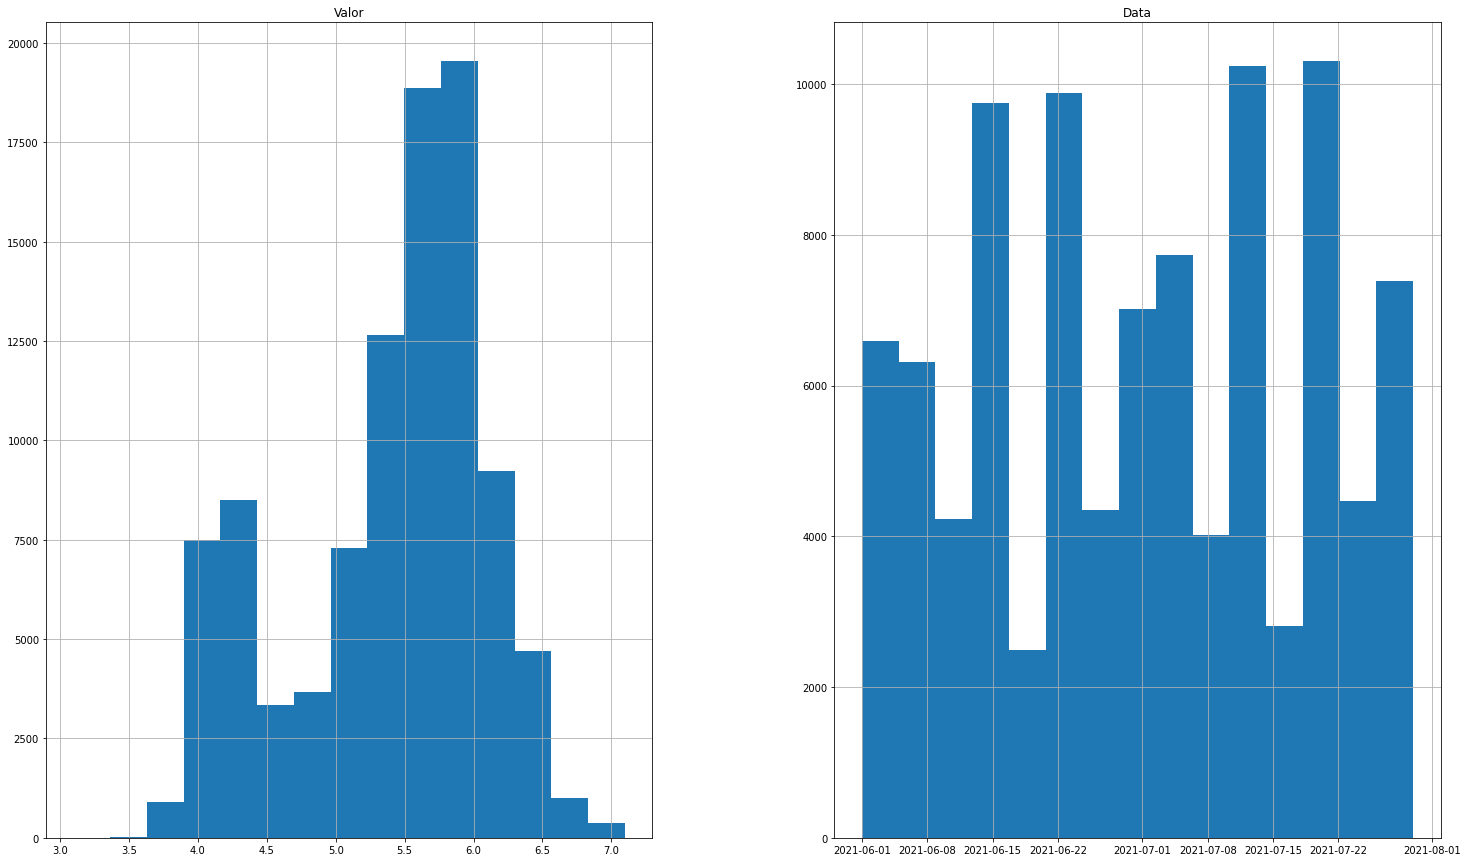

In [22]:
# Contrução dos histogramas das variáveis do dataset.

df.hist(bins=15, figsize=(25,15));

**Quanto a distribuição do histograma podemos verificar que:**

* Há um pico no **`Valor`** de venda de combustíveis entre 5.50 e 6.00 reais;
* Existem períodos com maior coleta de dados.

In [23]:
# Construindo os resumos estatísticos das variáveis numéricas usando a função describe.

df.describe()

,Valor
count,97586.000000
mean,5.384929
std,0.715136
min,3.097000
25%,4.990000
50%,5.550000
75%,5.899000
max,7.097000


## **Quanto ao resumo das estatísticas, das variáveis numéricas do dataset, podemos verificar que:**

Verificamos que 75% dos combustíveis é vendido a menos que R$5,89
O desvio padrão de 0.71 indica que há uma pequena dispersão nos valores

## **5. Análise exploratória** 

Problemas Investigados acerca das questões propostas:


#### ***01: Brunna***

##### 1) Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?

In [24]:
etanol = df.query('Produto == "ETANOL"')
gasolina = df.query('Produto == "GASOLINA"')

evolucao_precos_etanol = etanol.sort_values(['Data']).groupby('Data')['Valor'].mean()
evolucao_precos_gasolina = gasolina.sort_values(['Data']).groupby('Data')['Valor'].mean()

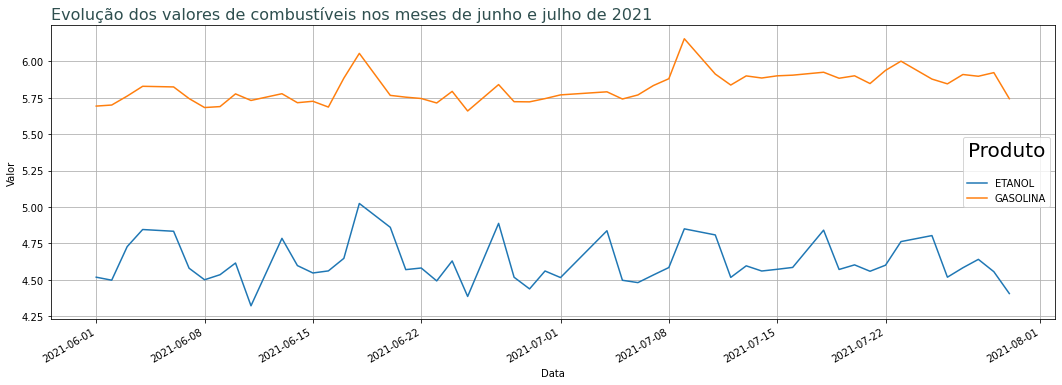

In [25]:
fig, ax = plt.subplots(figsize=(18, 6))

# rotacionar das datas
fig.autofmt_xdate()

plt.grid(True)

# Adiconando títulos
plt.title("Evolução dos valores de combustíveis nos meses de junho e julho de 2021", loc='left', fontsize=16, fontweight=0, color='darkslategray')
plt.xlabel("Data")
plt.ylabel("Valor")

# Mostrando a evolução
plt.plot(evolucao_precos_etanol)
plt.plot(evolucao_precos_gasolina)

#Adicionando legenda
legend = plt.legend(['ETANOL','GASOLINA'], title = "Produto", title_fontsize = 20)
legend._legend_box.sep = 18

In [26]:
df.groupby(['Data','Produto'])['Valor'].describe()

count      mean       std  ...    50%      75%    max
Data       Produto                               ...                       
2021-06-01 ETANOL     884.0  4.517171  0.497670  ...  4.379  4.86100  6.100
           GASOLINA  1731.0  5.693404  0.339301  ...  5.650  5.94800  6.890
2021-06-02 ETANOL    1009.0  4.496550  0.496872  ...  4.299  4.85000  6.890
           GASOLINA  1932.0  5.700649  0.352055  ...  5.690  5.95900  6.999
2021-06-03 ETANOL     282.0  4.727348  0.554527  ...  4.799  4.99900  5.999
...                     ...       ...       ...  ...    ...      ...    ...
2021-07-28 GASOLINA  1882.0  5.898512  0.359835  ...  5.898  6.18000  6.999
2021-07-29 ETANOL     418.0  4.554981  0.592926  ...  4.399  4.95000  6.797
           GASOLINA   887.0  5.923453  0.396760  ...  5.959  6.19900  7.097
2021-07-30 ETANOL      35.0  4.404714  0.403432  ...  4.199  4.92900  5.190
           GASOLINA    70.0  5.744300  0.325821  ...  5.623  6.07975  6.392

[102 rows x 8 columns]

In [27]:
df.groupby(df['Data'].dt.month).mean()

,Valor
Data,
6,5.339212
7,5.432450


**Quanto às questões ligadas à evolução dos valores dos combustíveis, podemos verificar que:**

* A **gasolina** começou o mês de junho, com o valor médio de **5,693 reais**  e fechou o mês  de julho com uma média de **5,744 reais**. Apesar das oscilações durante o período o valor manteve-se estável com uma alta de apenas 1%.

* No início de junho o **etanol** estava em **4,517 reais** o litro. E fechou o mês de julho com uma média de **4,404 reais** apresentando uma queda de 2,5%.

* De maneira geral os combustíveis tiveram em junto teve seu preço médio em **5,339 reais** e em julho em **5,432 reais**, tendo um aumento de **1,74 %**.

* Comparando os dois combustíveis verificamos que o etanol sofre maior oscilação de valores do que a gasolina que teve seu valor mais estável.

##### 2) Qual o preço médio da gasolina e do etanol nesses dois meses?

In [28]:
df.groupby('Produto')['Valor'].describe()

,count,mean,std,min,25%,50%,75%,max
Produto,,,,,,,,
ETANOL,33096.0,4.581825,0.533944,3.097,4.159,4.399,4.997,6.999
GASOLINA,64490.0,5.797078,0.355950,4.199,5.520,5.790,5.999,7.097


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


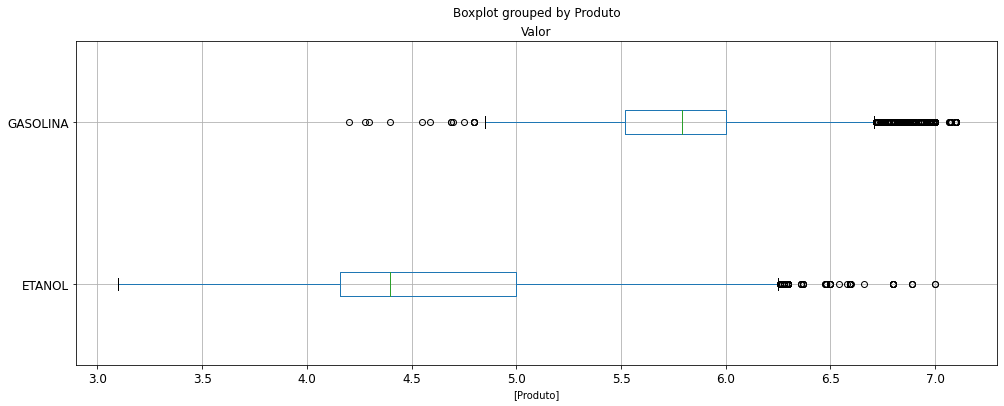

In [29]:
df.boxplot(by=["Produto"], figsize=(16,6), fontsize=12, vert=False)

**Quanto às questões ligadas aos valores dos combustíveis, podemos verificar que:**

* O valor médio do **etanol** nos meses de junho e julho de 2021 fica em torno de **4,581 reais**, com desvio padrão de **0,533**, mediana de **4,399 reais**, com valores máximos chegando a **6,999 reais**. Cabendo ressaltar que 75% dos preços estão abaixo do valor de **4,997** reais.

* O valor médio da **gasolina** nos meses de junho e julho de 2021 fica em torno de **5,797 reais**, com desvio padrão de **0,355**, mediana de **5,790 reais**, com valores máximos chegando a **7,097 reais**. Cabendo ressaltar que 75% dos preços estão abaixo do valor de **5,999** reais.


#### ***02: Gabriel***

#####3) Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

* **Localizando os preços médios da GASOLINA por Estado:**

In [30]:
media_gasolina_x_estado=df.loc[df['Produto']=='GASOLINA']
media_gasolina=media_gasolina_x_estado.groupby('Estado').Valor.mean()

* **Ordenando os dados por valores(decrescentes) para indicação dos 5 (cinco) estados com preço médio de comercialização mais altos:**

In [31]:
rank_gasolina = media_gasolina.sort_values(ascending=False).reset_index()[:5]

* **Criando o gráfico de barras para visualização dos 5 (cinco) estados com os maiores preços médios de comercialização :**

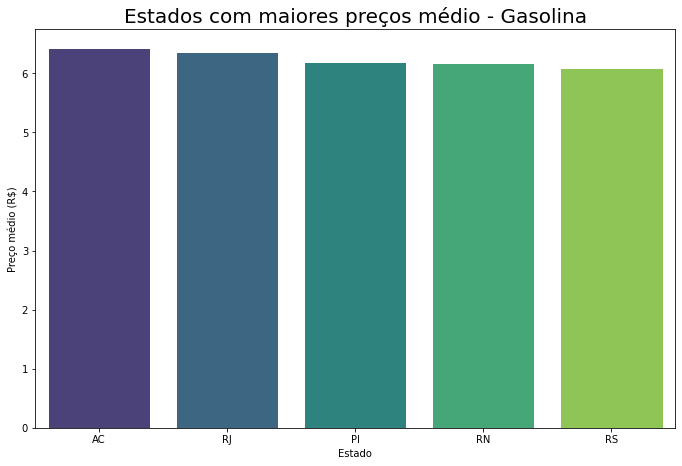

In [32]:
fig = plt.figure(figsize=(10,7))
plt.title('Estados com maiores preços médio - Gasolina', fontsize=20)

sns.set(font_scale=2)
sns.barplot(y='Valor', x='Estado', data=rank_gasolina, palette='viridis');
plt.ylabel('Preço médio (R$)')
plt.xlabel('Estado')


plt.tight_layout()

* **Localizando os preços médios do ETANOL por Estado:**

In [33]:
media_etanol_x_estado=df.loc[df['Produto']=='ETANOL']
media_etanol=media_etanol_x_estado.groupby('Estado').Valor.mean()

* **Ordenando os dados por valores (decrescentes) para indicação dos 5 primeiros:**

In [34]:
rank_etanol = media_etanol.sort_values(ascending=False).reset_index()[:5]


* **Criando o gráfico de barras para visualização dos 5 (cinco) estados com os maiores preços médios de comercialização :**

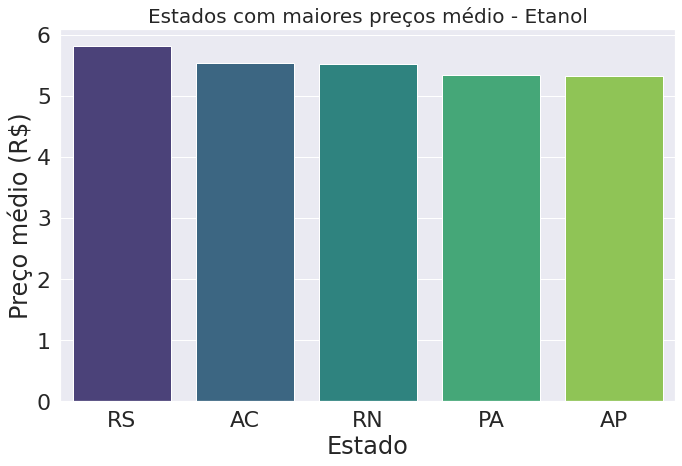

In [35]:
fig = plt.figure(figsize=(10,7))
plt.title('Estados com maiores preços médio - Etanol', fontsize=20)

sns.set(font_scale=2)
sns.barplot(y='Valor', x='Estado', data=rank_etanol, palette='viridis');
plt.ylabel('Preço médio (R$)')
plt.xlabel('Estado')


plt.tight_layout()

**Quanto às questões ligadas aos valores médios de comercialização dos combustíveis, podemos verificar que:**

* Para a gasolina, a distribuição dos estados que comercializam o produto com maior valor médio só não contempla a Região Centro-Oeste. Contudo, a predominância é na Região Nordeste (PI e RN).

* Para o etanol, a distribuição dos estados que comercializam o produto com maior valor médio está nos extremos do país. Contudo, a predominância é na região norte (AC e AP e PA).

#####4) Qual o preço médio da gasolina e do etanol por estado?

* **Combustível x Estado: Cálculo do preço médio dos combustíveis por Estado:**

In [36]:
media_estados = df.groupby(['Estado', 'Produto'])['Valor'].mean().reset_index()

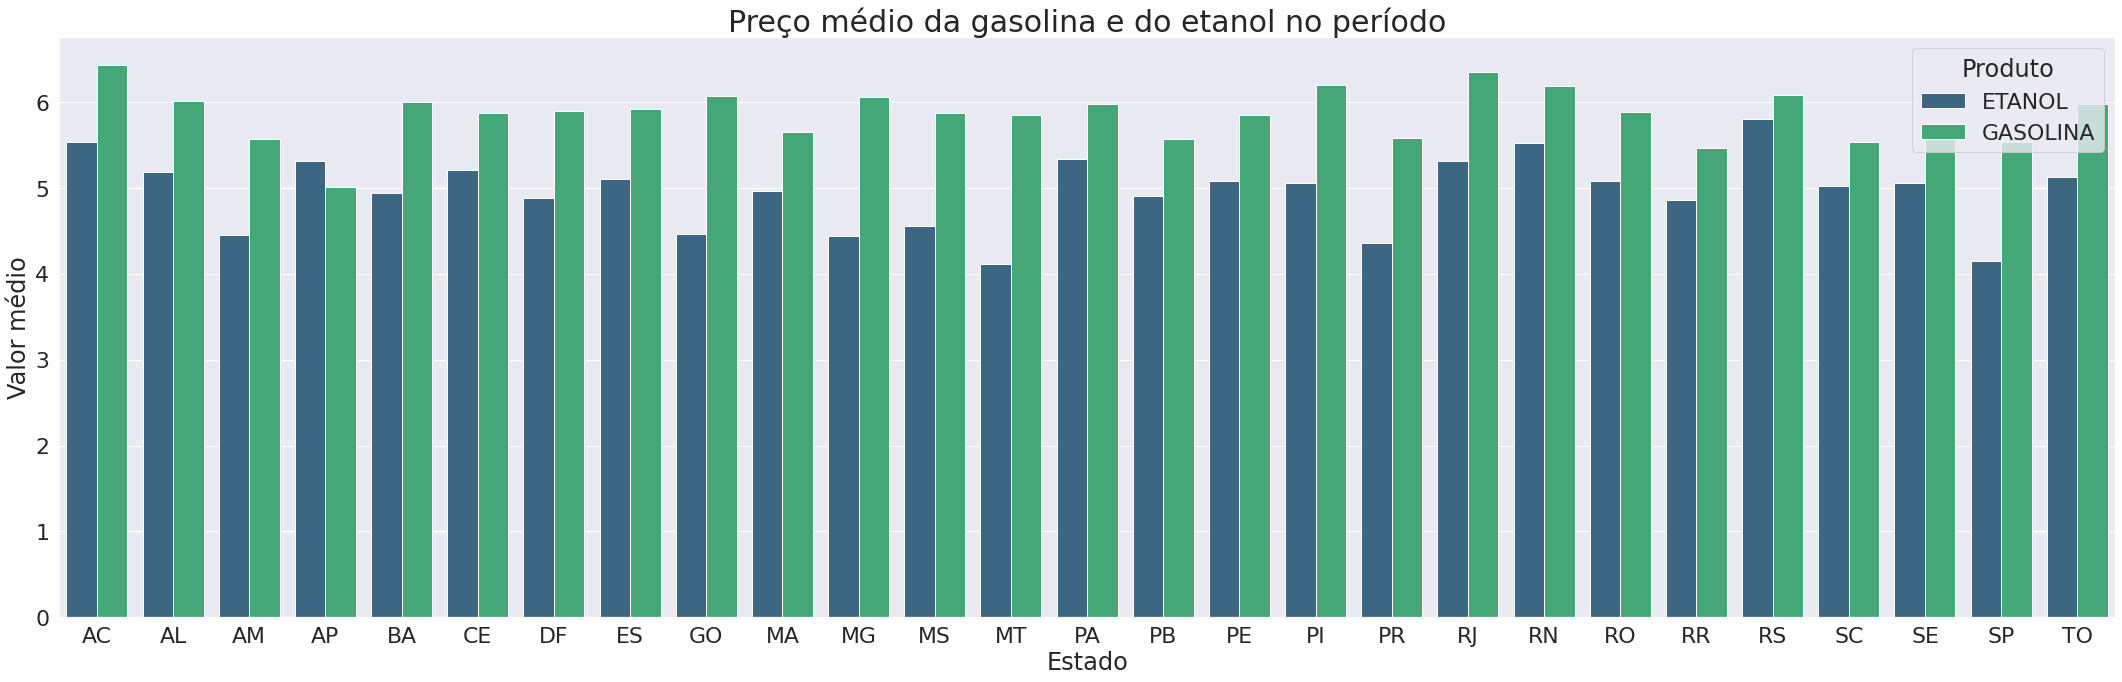

In [37]:
fig = plt.figure(figsize=(30,10))
plt.title('Preço médio da gasolina e do etanol no período', fontsize=30)

sns.set(font_scale=2)
sns.barplot(y='Valor', x='Estado', hue='Produto',  data=media_estados, palette='viridis');
plt.ylabel('Valor médio')
plt.xlabel('Estado')
plt.legend(title="Produto")

plt.tight_layout()

**Quanto às questões ligadas aos valores médios de comercialização dos combustíveis em todos os estados do território nacional, visualmente podemos verificar que:**

* Em alguns casos, o valor médio de comercialização do etanol ultrapassa o da gasolina. Como é o caso entre Paraíba e o Rio Grande Do Sul e também o Amapá, individualmente, entre os dois combustíveis.



#### ***03: Lucas (elaborado por Gabriel)***

#####5) Qual o município que possui o menor preço para a gasolina e para o etanol?

* **Localizando o município que possui o MENOR preço de venda de gasolina:**

In [38]:
menor_gasolina_x_municipio=df.loc[df['Produto']=='GASOLINA']
menor_gasolina=menor_gasolina_x_municipio.groupby('Municipio').Valor.min()
menor_municipio_gasolina=menor_gasolina.sort_values()
menor_municipio_gasolina.head(1)

Municipio
COTIA    4.199
Name: Valor, dtype: float64

* **Localizando o município que possui o MENOR preço de venda de etanol:**

In [39]:
menor_etanol_x_municipio=df.loc[df['Produto']=='ETANOL']
menor_etanol=menor_etanol_x_municipio.groupby('Municipio').Valor.min()
menor_municipio_etanol=menor_etanol.sort_values()
menor_municipio_etanol.head(1)

Municipio
SANTA BARBARA D'OESTE    3.097
Name: Valor, dtype: float64

##### 6) Qual o município que possui o maior preço para a gasolina e para o etanol?

* **Localizando o município que possui o MAIOR preço de venda de gasolina:**

In [40]:
maior_gasolina_x_municipio=df.loc[df['Produto']=='GASOLINA']
maior_gasolina=maior_gasolina_x_municipio.groupby('Municipio').Valor.max()
maior_municipio_gasolina=maior_gasolina.sort_values(ascending=False)
maior_municipio_gasolina.head(1)

Municipio
BAGE    7.097
Name: Valor, dtype: float64

* **Localizando o município que possui o MAIOR preço de venda de etanol:**

In [41]:
maior_etanol_x_municipio=df.loc[df['Produto']=='ETANOL']
maior_etanol=maior_etanol_x_municipio.groupby('Municipio').Valor.max()
maior_municipio_etanol=maior_etanol.sort_values(ascending=False)
maior_municipio_etanol.head(1)

Municipio
PELOTAS    6.999
Name: Valor, dtype: float64

**Quanto a nota explicativa das questões 5 e 6:**

* Não há informações de análise a serem extraídas por se tratar de dados específicos obtidos através de operações aritméticas.


#### ***04: Samyr***

##### 7) Qual a região que possui o maior valor médio da gasolina?

* **Região x Gasolina: Cálculo do preço médio da gasolina por região:**

In [42]:
gasol = df.loc[ df['Produto'] == 'GASOLINA' ]
max_reg_gasol = gasol.groupby('Regiao').Valor.mean().sort_values(ascending=False).reset_index()
max_reg_gasol

,Regiao,Valor
0,CO,5.934015
1,NE,5.917449
2,N,5.873776
3,S,5.771864
4,SE,5.730692


* **Localizando a região que possui o MAIOR valor médio de gasolina:**

In [43]:
max_reg_gasol.max()

Regiao          SE
Valor     5.934015
dtype: object

##### 8) Qual a região que possui o menor valor médio do etanol?

* **Região x Etanol: Cálculo do preço médio do etanol por região:**

In [44]:
etanol = df[df['Produto'].isin(['ETANOL'])]
min_reg_etanol = etanol.groupby('Regiao').agg({'Valor': 'mean'}).sort_values('Valor')
min_reg_etanol

,Valor
Regiao,
SE,4.354765
CO,4.406943
S,4.819885
N,5.046574
NE,5.090050


* **Localizando a região que possui o Menor valor médio de etanol:**

In [45]:
min_reg_etanol.min()

Valor    4.354765
dtype: float64

In [46]:
media_regiao = df.groupby(['Regiao', 'Produto'])['Valor'].mean().reset_index()

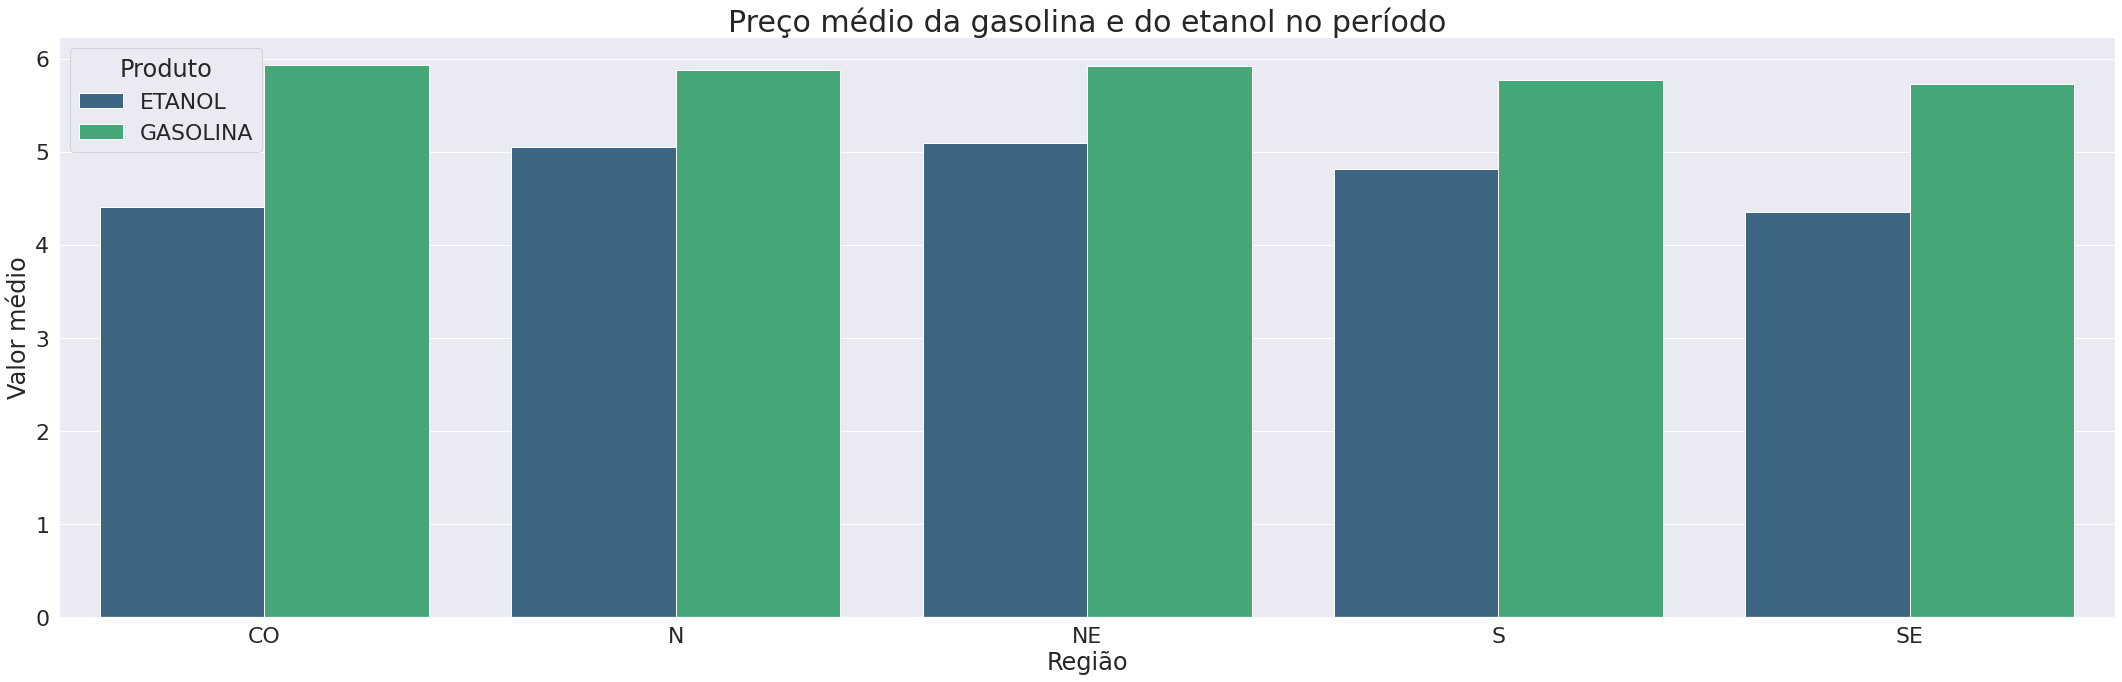

In [47]:
fig = plt.figure(figsize=(30,10))
plt.title('Preço médio da gasolina e do etanol no período', fontsize=30)

sns.set(font_scale=2)
sns.barplot(y='Valor', x='Regiao', hue='Produto',  data=media_regiao, palette='viridis');
plt.ylabel('Valor médio')
plt.xlabel('Região')
plt.legend(title="Produto")

plt.tight_layout()

**Quanto às questões ligadas aos valores médios de comercialização dos combustíveis em todas as regiões do território nacional, podemos verificar que:**

* A **gasolina** comparado ao etanol em todas as regiões, demonstradas no gráfico, tem valores médio maior. Já quando se fala dos valores da gasolina, nota-se que não tem muita variação e o **centro oeste** tem o maior valor médio entre todas as regiões
* Para o **etanol** observa-se que a variação do valor médio entre as regiões é um pouco maior quando se olha para a gasolina. E o **sudeste** tem o menor valor médio entre todas as regiões.

#### ***05: Vinicius***

##### 9) Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

A princípio nós efetuamos a operação para verificar o valor médio por região:

In [48]:
df_group_reg = df.groupby('Regiao')
data_1 = df_group_reg['Valor'].mean().round(3)
data_1

Regiao
CO    5.349
N     5.687
NE    5.634
S     5.526
SE    5.224
Name: Valor, dtype: float64

In [49]:
df_filter = df['Estado'].filter(like='SP', axis=0)
df_filter

Series([], Name: Estado, dtype: object)

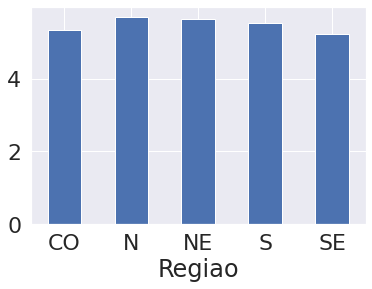

In [50]:
ax = data_1.plot.bar(x='Regiao', y='Valor', rot=0)

Após isso, calculamos os valores de média, moda e mediana:

In [51]:
data_2 = round(df['Valor'].mean(), 2)
data_2

5.38

In [52]:
data_3 = round(df['Valor'].mode(), 2)
data_3

0    5.6
dtype: float64

In [53]:
data_4 = round(df['Valor'].median(), 2)
data_4

5.55

E por último, podemos ver o total dos valores por região:


In [54]:
df_group_reg = df.groupby(['Regiao'])
data_5 = df_group_reg['Valor'].sum().round(2)
data_5

Regiao
CO     41682.59
N      28382.11
NE    103545.01
S      89543.26
SE    262340.70
Name: Valor, dtype: float64

* Analisando essas informações e levando considerações alguns fatores como frete, consumo médio, entre outros. Podemos ver que o valor da gasolina no Sudeste (Menor valor) é R$ 0,47 mais barata do que o valor mais alto, no caso, da região Norte. Isso se leva por conta de vários indicadores, podemos ver acima que o consumo no sudeste é muito maior do que no Norte, por conta disso, a demanda faz a oferta cair. Além disso, o frete do combustível impacta negativamente no preço e afeta bastante a região Norte do país.

##### 10) Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

In [55]:
df_group_band = df.groupby('Bandeira')
df_group_band['Valor'].mean().round(3).sort_values()

Bandeira
RUFF C.J.                       4.862
TORRAO                          4.862
PELIKANO                        4.916
UNI                             4.937
D`MAIS                          4.998
RZD DISTRIBUIDORA               5.027
ESTRADA                         5.057
STANG                           5.091
TAURUS                          5.204
CIAPETRO                        5.218
BRANCA                          5.233
POTENCIAL                       5.276
ROYAL FIC                       5.278
IDAZA                           5.288
DIBRAPE                         5.297
SIMARELLI                       5.307
WALENDOWSKY                     5.320
TOTAL BRASIL                    5.331
FEDERAL ENERGIA                 5.337
SMALL                           5.354
ATEM' S                         5.361
PETROSERRA                      5.382
RAIZEN MIME                     5.405
RAIZEN                          5.421
REJAILE                         5.432
IPIRANGA                        5.433
WAT

In [56]:
df_group_band = df.groupby('Bandeira')
df_group_band['Valor'].sum().round(3).sort_values(ascending = False)

Bandeira
BRANCA                          188006.059
PETROBRAS DISTRIBUIDORA S.A.    114250.888
IPIRANGA                         92179.120
RAIZEN                           88116.828
ALESAT                           11185.558
SABBÁ                             5861.789
RAIZEN MIME                       2816.205
ATEM' S                           2701.998
RODOIL                            2168.776
EQUADOR                           1942.136
SP                                1718.882
DISLUB                            1287.944
IDAZA                             1221.530
PETROX DISTRIBUIDORA               873.119
TAURUS                             853.392
CIAPETRO                           735.740
STANG                              697.528
SETTA DISTRIBUIDORA                648.726
CHARRUA                            631.816
TOTAL BRASIL                       613.023
RIO BRANCO                         595.370
SIMARELLI                          541.291
TDC DISTRIBUIDORA                  523.531
AM

#### **06. Questões elaboradas**

Problemas investigados acerca das questões extras elaboradas pela equipe:

##### 1) Quais foram as 3 revendas com maiores e as 3 com menores preços médios no período e em qual estado ela está localizada? 

In [57]:
a = df.groupby(['Estado', 'Revenda'])['Valor'].mean().sort_values(ascending=False)
print(a[:3])
print(a[-3:])


Estado  Revenda                  
AC      J. ARAUJO DE OLIVEIRA        6.923333
        MARCOS A.S. CORDEIRO         6.896667
        LUBRAS DISTRIBUIDORA LTDA    6.893333
Name: Valor, dtype: float64
Estado  Revenda                                    
SP      AUTO POSTO JARDIM DO CAMBUCI LTDA              4.2990
        CENTRO AUTOMOTIVO SGS CAPITÃO CAMARGO LTDA.    4.2985
        AUTO POSTO GRAN PRIX LTDA                      4.2790
Name: Valor, dtype: float64


**Quanto às questões ligadas aos valores dos combustíveis, podemos verificar que:**

* Os valores de comercialização mais altos estão contidos no Acre. Estando assim, ligados diretamente a fatores de custeio de transporte e da baixa demanda por número de revendas.

* Os valores de comercialização mais baixo estão contidos em São Paulo. Esse fato se verifica pela grande quantidade de revendas no estado e pela alta demanda por ser um grande centro urbano.

##### 2) Existe alguma relação dos estados que vendem a gasolina mais cara com a quantidade de revendas que eles possuem?

In [58]:
rank_gasolina

,Estado,Valor
0,AC,6.434892
1,RJ,6.353294
2,PI,6.197502
3,RN,6.182866
4,RS,6.084994


In [59]:
tot_rev

,Estado,Revenda
0,SP,34677
1,MG,7494
2,RJ,6391
3,PR,6154
4,RS,5600
5,BA,4801
6,SC,4450
7,CE,4220
8,PE,3042
9,MT,2765


**Acerca dos dados analisados pode-se concluir que:**

* Apenas com estes dados não é possível definir nenhuma relação entre as partes. Isso é devido ao fato de que os estados possuem muita dispairidade entre o número de revendas. Pode-se afirmar isto observando os dados, onde: Acre, Piauí e Rio Grande Do Norte estão na faixa entre 950 ~ 1300 revendas e ocupam 1º, 3º e 4º lugar, respectivamente. Já o Rio de Janeiro e o Rio Grande Do Sul estão na faixa entre 5600 ~ 6400 revendas e ocupam 2º e 5º lugar, respectivamente, tendo assim, praticamente 5 vezes o número de revendas.



## **7. Referências**

* https://www.gov.br/anp/pt-br
* https://www.fecombustiveis.org.br/
* https://pandas.pydata.org/docs/reference/index.html
* https://matplotlib.org/stable/index.html
* https://www.python-graph-gallery.com/